In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_blobs, make_classification

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Prepare the data for Logistic Regression

### Read the relevant data sets

In [3]:
data = pd.read_csv('Clean_data.csv')

In [4]:
data.shape

(558211, 66)

In [5]:
data['treatment_days'] = [0 if x == 'None' else x for x in data['treatment_days']]

In [6]:
data["treatment_days"] = pd.to_numeric(data["treatment_days"])


In [7]:
fraud = pd.read_csv('Train_fraud.csv')

In [235]:
data.head(100)

,Provider,Patient_Connections,AttPhys_Connections,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,Inpatient,ClmProcedureCode,ClmProcedureCode_count,ClmDiagnosisCode_count,treatment_days,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,num_chronic,PotentialFraud,Age,duplicate,claim_Days,V5869_diagcode,Other_diagcode,None_diagcode,V5861_diagcode,2724_diagcode,4011_diagcode,2449_diagcode,4019_diagcode,25000_diagcode,42731_diagcode,PHY338032,None_PHY,PHY341578,PHY357120,PHY330576,PHY337425,PHY314027,PHY327046,PHY412132,PHY350277,PHY423534
0,PRV51001,24,14,BENE32715,CLM272936,2009-03-29,2009-03-30,500,None,1,0.0,None,0.0,0.0,0.0,6.0,0.0,None,1,1,0.0,1,410,12,12,1,1,1,1,1,1,1,1,0,0,0,2020,1068,6700,2700,8.0,0,73,0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,PRV51001,24,14,BENE36012,CLM58316,2009-07-04,2009-07-08,36000,2009-07-04 00:00:00,1,1068.0,2009-07-08 00:00:00,1.0,0.0,0.0,8.0,4.0,None,1,1,0.0,1,510,12,12,0,1,1,0,0,1,1,1,0,0,1,36000,1068,3520,140,6.0,0,69,0,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,PRV51001,24,14,BENE38773,CLM52334,2009-05-23,2009-05-25,12000,2009-05-23 00:00:00,1,1068.0,2009-05-25 00:00:00,1.0,0.0,0.0,6.0,2.0,None,1,1,0.0,1,160,12,12,0,0,1,0,0,0,0,0,0,0,0,95000,2136,2270,900,1.0,0,71,0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,PRV51001,24,14,BENE49220,CLM452024,2009-07-04,2009-07-04,70,None,1,0.0,None,0.0,0.0,0.0,1.0,0.0,None,1,1,0.0,1,510,12,12,1,1,0,0,0,0,0,1,1,0,0,5000,1068,370,70,4.0,0,90,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,PRV51001,24,14,BENE98831,CLM36844,2009-02-03,2009-02-08,3000,2009-02-03 00:00:00,1,1068.0,2009-02-08 00:00:00,1.0,0.0,0.0,7.0,5.0,None,2,1,0.0,1,510,12,12,1,1,0,0,0,1,1,1,0,1,0,3000,1068,0,0,6.0,0,74,0,5.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,PRV51001,24,14,BENE102690,CLM49733,2009-05-04,2009-05-18,42000,2009-05-04 00:00:00,1,1068.0,2009-05-18 00:00:00,1.0,1.0,2.0,9.0,14.0,None,2,1,1.0,1,160,12,12,0,1,1,0,1,1,1,1,0,1,0,143800,4272,880,70,7.0,0,79,0,14.0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
6,PRV51001,24,14,BENE130029,CLM168357,2009-01-31,2009-01-31,1000,None,0,0.0,None,0.0,0.0,0.0,2.0,0.0,None,2,1,0.0,1,660,12,12,1,1,0,0,1,0,1,1,0,0,1,7000,1068,4480,200,6.0,0,81,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,PRV51001,24,14,BENE130029,CLM262535,2009-03-23,2009-03-23,90,None,0,0.0,None,0.0,0.0,0.0,1.0,0.0,None,2,1,0.0,1,660,12,12,1,1,0,0,1,0,1,1,0,0,1,7000,1068,4480,200,6.0,0,82,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,PRV51001,24,14,BENE146687,CLM316146,2009-04-21,2009-04-21,100,None,0,0.0,None,0.0,0.0,0.0,2.0,0.0,None,2,2,0.0,1,410,12,12,1,1,1,1,1,1,1,1,1,0,0,13300,3204,4190,150,9.0,0,88,0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,PRV51001,24,14,BENE152088,CLM37205,2009-02-06,2009-02-06,4000,2009-02-06 00:00:00,1,1068.0,2009-02-06 00:00:00,1.0,1.0,1.0,6.0,0.0,None,2,1,1.0,1,160,12,12,1,1,1,1,1,1,1,1,0,1,1,111710,4272,80,70,10.0,0,95,0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [315]:
data.Other_diagcode.value_counts()

1    558211
Name: Other_diagcode, dtype: int64

### Groupby provider

In [8]:
def groupby_provider(data):
    '''
    This function converts DOD and gender to binary code and groups data by provider.
    '''
    data['DOD'] = [0 if x == 'None' else 1 for x in data['DOD']]
    
    data['Gender'] = [1 if x == 2 else 0 for x in data['Gender']]
    
    num_claims = data.groupby('Provider')['ClaimID'].count()
    
    sum_features = data.groupby('Provider')[['DOD', 'ClmAdmitDiagnosisCode','Inpatient','ClmProcedureCode','ClmProcedureCode_count',
                             'ClmDiagnosisCode_count', 'RenalDiseaseIndicator', 'duplicate','V5869_diagcode',
                            'V5861_diagcode','2724_diagcode','4011_diagcode',
                            '2449_diagcode','4019_diagcode','25000_diagcode','42731_diagcode']].sum().reset_index() 
    
    mean_features = data.groupby('Provider')[['Patient_Connections','AttPhys_Connections','InscClaimAmtReimbursed',
                            'DeductibleAmtPaid','treatment_days','Gender', 'IPAnnualReimbursementAmt', 
                                  'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'IPAnnualDeductibleAmt',
                                  'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'num_chronic',
                                  'Age','claim_Days']].mean().reset_index()
    
    data2 = pd.merge(num_claims, sum_features, how="outer", on="Provider")
    
    data3 = pd.merge(data2, mean_features, how="outer", on="Provider")
    
    return data3

In [9]:
data2 = groupby_provider(data)

In [10]:
data2.shape

(5410, 33)

In [239]:
data2.head()

,Provider,ClaimID,DOD,ClmAdmitDiagnosisCode,Inpatient,ClmProcedureCode,ClmProcedureCode_count,ClmDiagnosisCode_count,RenalDiseaseIndicator,duplicate,V5869_diagcode,Other_diagcode,V5861_diagcode,2724_diagcode,4011_diagcode,2449_diagcode,4019_diagcode,25000_diagcode,42731_diagcode,Patient_Connections,AttPhys_Connections,InscClaimAmtReimbursed,DeductibleAmtPaid,treatment_days,Gender,IPAnnualReimbursementAmt,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,num_chronic,Age,claim_Days
0,PRV51001,25,0,11,5.0,2.0,3.0,80.0,8.0,12,1,25,0,2,0,1,3,1,2,24.0,14.0,4185.600000,213.600000,1.000000,0.640000,17606.000000,12.000000,12.000000,897.120000,2615.200000,463.920000,5.560000,77.880000,1.440000
1,PRV51003,132,1,78,62.0,39.0,48.0,693.0,29.0,30,7,132,6,16,3,12,25,15,11,117.0,44.0,4588.409091,502.166667,2.424242,0.590909,7568.181818,11.818182,11.871212,931.424242,2678.181818,737.121212,4.545455,69.083333,3.674242
2,PRV51004,149,1,28,0.0,0.0,0.0,385.0,23.0,76,2,149,4,12,6,8,22,8,3,138.0,38.0,350.134228,2.080537,0.000000,0.691275,4351.879195,11.865772,11.959732,434.953020,2194.899329,622.751678,4.342282,71.261745,1.429530
3,PRV51005,1165,4,252,0.0,0.0,0.0,3016.0,259.0,565,56,1165,47,73,62,30,140,54,23,495.0,7.0,241.124464,3.175966,0.000000,0.561373,3623.991416,11.907296,11.939914,379.162232,2109.733906,636.328755,4.335622,69.526180,1.088412
4,PRV51007,72,1,17,3.0,1.0,1.0,215.0,11.0,31,2,72,7,5,3,6,10,6,2,58.0,10.0,468.194444,45.333333,0.222222,0.527778,3050.000000,11.833333,11.833333,445.000000,1729.722222,469.722222,4.166667,68.305556,0.958333


### Binary code PotentialFraud and merge fraud with data

In [11]:
fraud['PotentialFraud'] = [1 if x == 'Yes' else 0 for x in fraud['PotentialFraud']]

In [241]:
fraud.head()

,Provider,PotentialFraud
0,PRV51001,0
1,PRV51003,1
2,PRV51004,0
3,PRV51005,1
4,PRV51007,0


In [12]:
final_data = pd.merge(data2, fraud, how="outer", on="Provider")

In [13]:
final_data.drop(['Provider'],axis=1, inplace=True)

In [14]:
final_data.shape

(5410, 33)

# Logistic Regression Analysis

From https://towardsdatascience.com/weighted-logistic-regression-for-imbalanced-dataset-9a5cd88e68b

"...evaluation metrics like ROC-AUC curve are a good indicator of classifier performance. It is a measure of how good model is at distinguishing between various class. Higher the ROC-AUC score, better the model is at predicting 0s as 0s and 1s as 1s. Just to remind, ROC is a probability curve and AUC represents degree or measure of separability. Apart from this metric, we will also check on recall score, false-positive (FP) and false-negative (FN) score as we build our classifier."

### Split into train and test for cross-validation

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# split dataset into x,y
x = final_data.drop(['PotentialFraud'],axis=1)
y = final_data['PotentialFraud']
# train-test split
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(x), y, test_size=0.3, random_state=13)

In [16]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [17]:
#Create an oversampled training data
smote = SMOTE(random_state = 13)
X_oversample, y_oversample = smote.fit_resample(X_train, y_train)

In [19]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report

### Default model vs. SMOTE

In [24]:
# define model
lg1 = LogisticRegression(random_state=13, class_weight=None, max_iter=2000)
# fit it
lg1.fit(X_train,y_train)
# test
print(classification_report(y_test, lg1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1457
           1       0.77      0.40      0.52       166

    accuracy                           0.93      1623
   macro avg       0.85      0.69      0.74      1623
weighted avg       0.92      0.93      0.92      1623



In [23]:

# define model
lg1_smote = LogisticRegression(random_state=13, class_weight=None, max_iter=2000)
# fit it
lg1_smote.fit(X_oversample,y_oversample)
print(classification_report(y_test, lg1_smote.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1457
           1       0.46      0.80      0.58       166

    accuracy                           0.88      1623
   macro avg       0.72      0.84      0.76      1623
weighted avg       0.92      0.88      0.90      1623



In [194]:
y_test.value_counts()

0    1457
1     166
Name: PotentialFraud, dtype: int64

### Weighted model based on proportion of data with majority label (PotentialFraud=0) vs. minority label (PotentialFraud=1)

In [55]:
print("majority label is %f of the data set" %((4904/5410)*100)) #4904 providers are non fraudulent
print("minority label is %f of the data set" %((506/5410)*100)) #506 providers are potentially fraudulent

majority label is 90.646950 of the data set
minority label is 9.353050 of the data set


### Tune hyperparameters, including penalization, C, fit_intercept

In [27]:
# define hyperparameters
crange = np.arange(0.5, 2.0, 0.5)
hyperparam_grid = {"C": crange
                   ,"fit_intercept": [True, False]  }

In [28]:
# logistic model classifier
lg_smote_ridge = LogisticRegression(random_state=13, penalty='l2', class_weight=None, max_iter=2000)
# define evaluation procedure
grid = GridSearchCV(lg_smote_ridge,hyperparam_grid,scoring="precision", cv=100, refit=True)
grid.fit(StandardScaler().fit_transform(x),y)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

Best score: 0.7711904761904762 with param: {'C': 1.0, 'fit_intercept': True}


In [37]:
# define model
lg_smote_ridge = LogisticRegression(random_state=13,C=1.0,fit_intercept=True, penalty='l2',class_weight=None, max_iter=2000)
# fit it
lg_smote_ridge.fit(X_oversample,y_oversample)
# test
print(classification_report(y_test, lg_smote_ridge.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1457
           1       0.46      0.80      0.58       166

    accuracy                           0.88      1623
   macro avg       0.72      0.84      0.76      1623
weighted avg       0.92      0.88      0.90      1623



In [32]:
# logistic model classifier
lg_smote_lasso = LogisticRegression(random_state=13, penalty='l1', solver='liblinear', class_weight=None, max_iter=2000)
# define evaluation procedure
grid = GridSearchCV(lg_smote_lasso,hyperparam_grid,scoring="precision", cv=100, refit=True)
grid.fit(StandardScaler().fit_transform(x),y)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

Best score: 0.7679761904761905 with param: {'C': 1.5, 'fit_intercept': True}


In [38]:
# define model
lg_smote_lasso = LogisticRegression(random_state=13,C=1.5,fit_intercept=True, penalty='l1', solver='liblinear', class_weight=None, max_iter=2000)
# fit it
lg_smote_lasso.fit(X_oversample,y_oversample)
# test
print(classification_report(y_test, lg_smote_lasso.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1457
           1       0.46      0.78      0.58       166

    accuracy                           0.88      1623
   macro avg       0.71      0.84      0.75      1623
weighted avg       0.92      0.88      0.90      1623



### Get Feature Importance based on ideal model

Feature: 0, Score: 0.73109
Feature: 1, Score: 0.02816
Feature: 2, Score: 0.66724
Feature: 3, Score: 0.37766
Feature: 4, Score: 0.53365
Feature: 5, Score: 0.11149
Feature: 6, Score: 0.54946
Feature: 7, Score: 0.29865
Feature: 8, Score: 0.22593
Feature: 9, Score: 0.41946
Feature: 10, Score: 0.30035
Feature: 11, Score: 0.34881
Feature: 12, Score: 0.12415
Feature: 13, Score: 0.06823
Feature: 14, Score: 0.58053
Feature: 15, Score: 0.15678
Feature: 16, Score: 0.46105
Feature: 17, Score: 0.95304
Feature: 18, Score: 0.24011
Feature: 19, Score: 0.09713
Feature: 20, Score: 0.23279
Feature: 21, Score: 0.12396
Feature: 22, Score: 0.06650
Feature: 23, Score: 0.09007
Feature: 24, Score: 0.01821
Feature: 25, Score: 0.02631
Feature: 26, Score: 0.11247
Feature: 27, Score: 0.23955
Feature: 28, Score: 0.19202
Feature: 29, Score: 0.13037
Feature: 30, Score: 0.04449
Feature: 31, Score: 0.01777


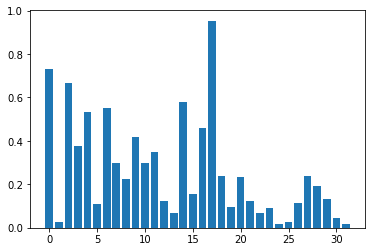

In [39]:
# get importance
importance = abs(lg1.coef_[0])
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#The positive scores indicate a feature that predicts class 1, 
#whereas the negative scores indicate a feature that predicts class 0.

In [327]:
x.columns

Index(['ClaimID', 'DOD', 'ClmAdmitDiagnosisCode', 'Inpatient',
       'ClmProcedureCode', 'ClmProcedureCode_count', 'ClmDiagnosisCode_count',
       'RenalDiseaseIndicator', 'duplicate', 'V5869_diagcode',
       'V5861_diagcode', '2724_diagcode', '4011_diagcode', '2449_diagcode',
       '4019_diagcode', '25000_diagcode', '42731_diagcode',
       'Patient_Connections', 'AttPhys_Connections', 'InscClaimAmtReimbursed',
       'DeductibleAmtPaid', 'treatment_days', 'Gender',
       'IPAnnualReimbursementAmt', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'num_chronic',
       'Age', 'claim_Days'],
      dtype='object')

### Summary of Feature Importance


The following features are most important in classification of fraud vs. non-fraud. 

- <span style="color:red">Patient_Connections</span>
- <span style="color:red">4019_diagcode</span>
- <span style="color:red">ClaimID (number of claims)</span>
- <span style="color:red">DOD</span>
- <span style="color:red">ClmAdmitDiagnosisCode</span>
- <span style="color:red">ClmProcedureCode</span>
- <span style="color:red">ClmDiagnosisCode_count</span>
- <span style="color:red">V5869_diagcode</span>
- <span style="color:red">42731_diagcode</span>
- <span style="color:red">Inpatient</span>
- <span style="color:red">V5861_diagcode</span>
- <span style="color:red">2724_diagcode</span>


The following features are less important in classification of fraud vs. non-fraud. 

- <span style="color:red">RenalDiseaseIndicator</span>
- <span style="color:red">25000_diagcode</span>
- <span style="color:red">AttPhys_Connections</span>
- <span style="color:red">DeductibleAmtPaid</span>
- <span style="color:red">OPAnnualReimbursementAmt</span>
- <span style="color:red">OPAnnualDeductibleAmt</span>

The following features are either almost or completely unimportant in classification of fraud vs. non-fraud, in part due to multicollinearity. 

- <span style="color:red">ClmProcedureCode_count</span> #multicollinear with ClmProcedureCode
- <span style="color:red">duplicate</span> #multicollinear with code columns
- <span style="color:red">4011_diagcode</span>
- <span style="color:red">2449_diagcode</span>
- <span style="color:red">InscClaimAmtReimbursed</span>
- <span style="color:red">treatment_days</span>
- <span style="color:red">Gender</span> 
- <span style="color:red">IPAnnualReimbursementAmt</span> 
- <span style="color:red">NoOfMonths_PartACov</span>
- <span style="color:red">NoOfMonths_PartBCov</span>
- <span style="color:red">IPAnnualDeductibleAmt</span>
- <span style="color:red">num_chronic</span>
- <span style="color:red">Age</span>
- <span style="color:red">claim_Days</span>

In [215]:
x.head(500)

,ClaimID,DOD,ClmAdmitDiagnosisCode,Inpatient,ClmProcedureCode,ClmProcedureCode_count,ClmDiagnosisCode_count,RenalDiseaseIndicator,duplicate,V5869_diagcode,Other_diagcode,V5861_diagcode,2724_diagcode,4011_diagcode,2449_diagcode,4019_diagcode,25000_diagcode,42731_diagcode,Patient_Connections,AttPhys_Connections,InscClaimAmtReimbursed,DeductibleAmtPaid,treatment_days,Gender,IPAnnualReimbursementAmt,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,num_chronic,Age,claim_Days
0,25,0,11,5.0,2.0,3.0,80.0,8.0,12,1,25,0,2,0,1,3,1,2,24.0,14.0,4185.600000,213.600000,1.000000,0.640000,17606.000000,12.000000,12.000000,897.120000,2615.200000,463.920000,5.560000,77.880000,1.440000
1,132,1,78,62.0,39.0,48.0,693.0,29.0,30,7,132,6,16,3,12,25,15,11,117.0,44.0,4588.409091,502.166667,2.424242,0.590909,7568.181818,11.818182,11.871212,931.424242,2678.181818,737.121212,4.545455,69.083333,3.674242
2,149,1,28,0.0,0.0,0.0,385.0,23.0,76,2,149,4,12,6,8,22,8,3,138.0,38.0,350.134228,2.080537,0.000000,0.691275,4351.879195,11.865772,11.959732,434.953020,2194.899329,622.751678,4.342282,71.261745,1.429530
3,1165,4,252,0.0,0.0,0.0,3016.0,259.0,565,56,1165,47,73,62,30,140,54,23,495.0,7.0,241.124464,3.175966,0.000000,0.561373,3623.991416,11.907296,11.939914,379.162232,2109.733906,636.328755,4.335622,69.526180,1.088412
4,72,1,17,3.0,1.0,1.0,215.0,11.0,31,2,72,7,5,3,6,10,6,2,58.0,10.0,468.194444,45.333333,0.222222,0.527778,3050.000000,11.833333,11.833333,445.000000,1729.722222,469.722222,4.166667,68.305556,0.958333
5,43,0,9,2.0,2.0,2.0,136.0,10.0,17,0,43,2,7,2,3,9,4,2,36.0,10.0,828.604651,53.860465,0.186047,0.558140,6592.093023,12.000000,12.000000,620.930233,2570.465116,616.046512,3.906977,74.604651,1.534884
6,58,1,13,1.0,0.0,0.0,147.0,12.0,29,0,58,1,5,2,5,10,2,0,53.0,28.0,286.724138,23.586207,0.086207,0.534483,4414.827586,12.000000,12.000000,674.275862,1399.310345,366.724138,4.586207,73.431034,0.551724
7,48,0,17,0.0,0.0,0.0,123.0,7.0,22,1,48,1,2,2,2,5,0,1,31.0,15.0,351.875000,2.083333,0.000000,0.770833,6935.416667,12.000000,11.500000,839.916667,3793.958333,735.208333,4.625000,73.541667,3.708333
8,46,0,12,0.0,0.0,0.0,117.0,11.0,19,4,46,0,2,2,1,4,2,0,44.0,9.0,323.478261,5.000000,0.000000,0.739130,3635.652174,12.000000,12.000000,593.304348,3226.521739,914.782609,4.413043,73.413043,1.456522
9,30,1,5,0.0,0.0,0.0,110.0,8.0,8,2,30,0,2,0,1,6,4,1,25.0,8.0,349.333333,4.000000,0.000000,0.766667,2786.333333,12.000000,12.000000,427.200000,1742.333333,649.333333,4.333333,70.200000,0.466667


In [299]:
final_data2 = StandardScaler().fit_transform(final_data)

In [300]:
final_data3 = pd.DataFrame(final_data2, columns = final_data.columns)

In [306]:
final_data3.groupby('PotentialFraud')[['ClaimID','Other_diagcode',
                                       'ClmAdmitDiagnosisCode','ClmProcedureCode',
                                       'ClmDiagnosisCode_count','42731_diagcode',
                                       'Patient_Connections','4019_diagcode',
                                       'V5869_diagcode','duplicate']].mean()

,ClaimID,Other_diagcode,ClmAdmitDiagnosisCode,ClmProcedureCode,ClmDiagnosisCode_count,42731_diagcode,Patient_Connections,4019_diagcode,V5869_diagcode,duplicate
PotentialFraud,,,,,,,,,,
-0.321218,-0.120199,-0.120199,-0.154296,-0.169902,-0.141157,-0.155349,-0.126409,-0.137945,-0.108963,-0.109202
3.113149,1.164931,1.164931,1.495391,1.646638,1.368049,1.505596,1.225121,1.336921,1.056041,1.058349


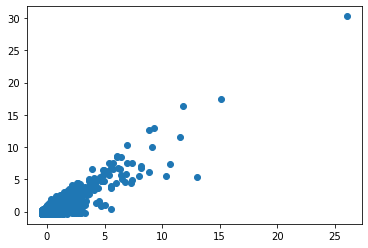

In [309]:
plt.scatter(final_data3['42731_diagcode'], final_data3.duplicate)

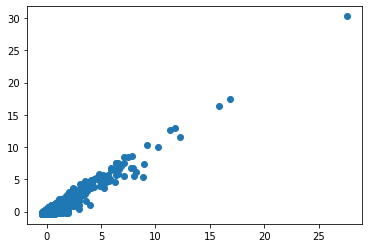

In [310]:
plt.scatter(final_data3['4019_diagcode'], final_data3.duplicate)

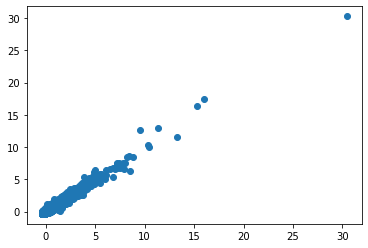

In [311]:
plt.scatter(final_data3['V5869_diagcode'], final_data3.duplicate)

In [312]:
final_data.columns

Index(['ClaimID', 'DOD', 'ClmAdmitDiagnosisCode', 'Inpatient',
       'ClmProcedureCode', 'ClmProcedureCode_count', 'ClmDiagnosisCode_count',
       'RenalDiseaseIndicator', 'duplicate', 'V5869_diagcode',
       'Other_diagcode', 'V5861_diagcode', '2724_diagcode', '4011_diagcode',
       '2449_diagcode', '4019_diagcode', '25000_diagcode', '42731_diagcode',
       'Patient_Connections', 'AttPhys_Connections', 'InscClaimAmtReimbursed',
       'DeductibleAmtPaid', 'treatment_days', 'Gender',
       'IPAnnualReimbursementAmt', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'num_chronic',
       'Age', 'claim_Days', 'PotentialFraud'],
      dtype='object')

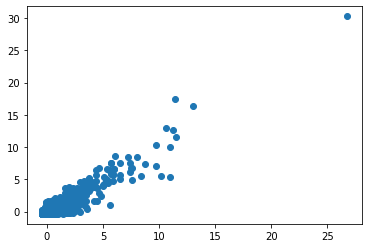

In [313]:
plt.scatter(final_data3['2449_diagcode'], final_data3.duplicate)

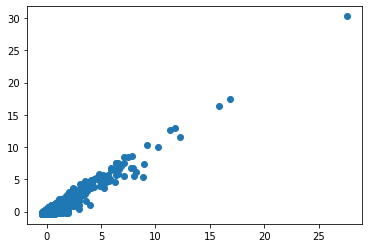

In [329]:
plt.scatter(final_data3['4019_diagcode'], final_data3.duplicate)

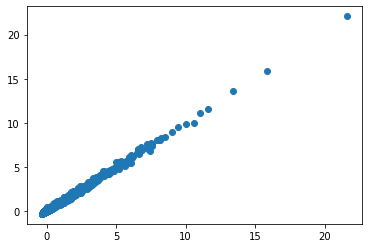

In [343]:
plt.scatter(final_data3['ClmProcedureCode'], final_data3.ClmProcedureCode_count)

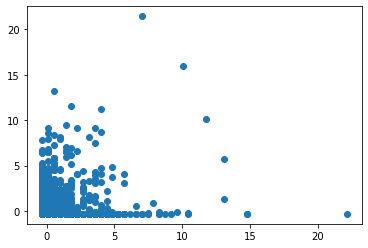

In [344]:
plt.scatter(final_data3.DOD, final_data3.Inpatient)